In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv('C:/Users/Chaitanya/Desktop/Machine Learning/Springboard/knn/iris_dataset.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


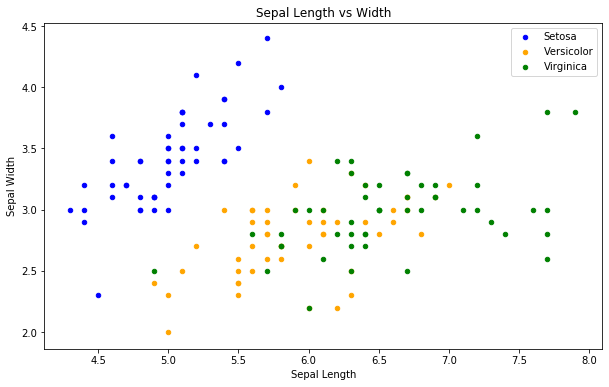

In [4]:
# Let's plot a scatter plot of the Iris features
fig = iris[iris.species=='Iris-setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue', label='Setosa',  figsize= (10,6))
iris[iris.species=='Iris-versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='orange', label='Versicolor',ax=fig)
iris[iris.species=='Iris-virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length vs Width")
plt.show()

In [45]:
X = iris.iloc[:,:4]
y = iris["species"]

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [7]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,1.4,0.3
88,5.6,3.0,4.1,1.3
39,5.1,3.4,1.5,0.2
74,6.4,2.9,4.3,1.3
112,6.8,3.0,5.5,2.1


In [8]:
X_test.head(3)

,sepal_length,sepal_width,petal_length,petal_width
128,6.4,2.8,5.6,2.1
18,5.7,3.8,1.7,0.3
130,7.4,2.8,6.1,1.9


In [9]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [10]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [11]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

In [16]:
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        25
Iris-versicolor       0.89      0.94      0.91        17
 Iris-virginica       0.94      0.89      0.91        18

      micro avg       0.95      0.95      0.95        60
      macro avg       0.94      0.94      0.94        60
   weighted avg       0.95      0.95      0.95        60



In [12]:
k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = round(metrics.accuracy_score(y_test, y_pred), 3)
    scores_list.append(scores[k])

print(scores)

{1: 0.95, 2: 0.95, 3: 0.967, 4: 0.967, 5: 0.967, 6: 0.983, 7: 0.983, 8: 0.983, 9: 0.983, 10: 0.983, 11: 0.983, 12: 0.983, 13: 0.983, 14: 0.983, 15: 0.983, 16: 0.983, 17: 0.983, 18: 0.967, 19: 0.983, 20: 0.967, 21: 0.967, 22: 0.967, 23: 0.967, 24: 0.95, 25: 0.95}


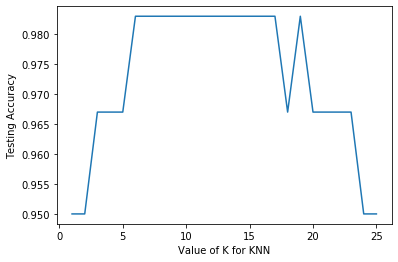

In [13]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()